In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib


In [3]:
from runAreaMask import * 
from skimage import measure
from matplotlib import _cntr as cntr

In [34]:
def read_all_tile_info():
    print 'Reading all tile info...'
    tile_info = dict()
    with open( 'all_pixel_tile_info.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            batch = row['batch']
            objid = int(row['objid'])
            tid = int(row['tile id'])
            t_area = float(row['tile area'])
            int_area = float(row['gt overlap area'])
            if batch not in tile_info:
                tile_info[batch] = dict()
            if objid not in tile_info[batch]:
                tile_info[batch][objid] = dict()
            if tid not in tile_info[batch][objid]:
                tile_info[batch][objid][tid] = dict()
            tile_info[batch][objid][tid]['t_area'] = t_area
            tile_info[batch][objid][tid]['int_area'] = int_area
    print 'Done'
    return tile_info

In [35]:
def create_obj_area_info():
    tile_info = read_all_tile_info()
    with open( 'obj_area_info.csv', 'w') as csvfile:
        obj_writer = csv.writer(csvfile, delimiter=',')
        fields = ['batch', 'objid', 'num_tiles', 'sum_of_tile_areas', 'sum_of_int_areas','actual_gt_area','img_area']
        obj_writer.writerow(fields)
        for batch in tile_info:
            for objid in tile_info[batch]:
                gt_mask = get_gt_mask(objid)
                img_area = np.product(np.shape(gt_mask))
                actual_gt_area = len(np.where(gt_mask==True)[0])
                sum_of_tile_areas = 0.0
                sum_of_int_areas = 0.0
                num_tiles = len(tile_info[batch][objid].keys())
                for tid in tile_info[batch][objid]:
                    sum_of_tile_areas += tile_info[batch][objid][tid]['t_area']
                    sum_of_int_areas += tile_info[batch][objid][tid]['int_area']
                obj_writer.writerow([batch, objid, num_tiles, sum_of_tile_areas, sum_of_int_areas,actual_gt_area,img_area])

In [36]:
create_obj_area_info()

Reading all tile info...
Done


In [37]:
df = pd.read_csv("obj_area_info.csv")

In [62]:
df["gt_diff_ratio"].mean()

-0.0082011109531286014

In [63]:
df["gt_diff_ratio"]=((df["sum_of_int_areas"] - df["actual_gt_area"])/df["actual_gt_area"])*100
df["total_diff"]=df["sum_of_tile_areas"]-df["img_area"]

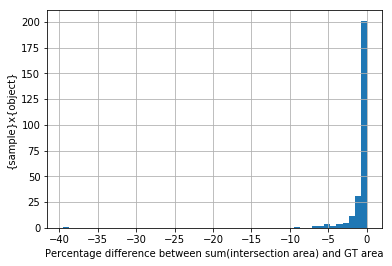

In [67]:
df["gt_diff_ratio"].hist(bins=50)
plt.xlabel("Percentage difference between sum(intersection area) and GT area")
plt.ylabel("{sample}x{object}")

In [81]:
df[df["gt_diff_ratio"]<-1][["batch","objid"]].to_csv("exclude_below1percent.csv",index=None)

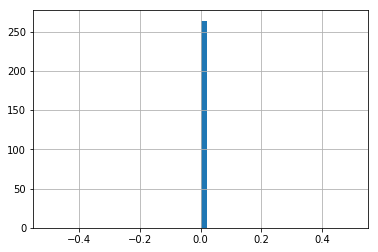

In [82]:
df["total_diff"].hist(bins=50)